In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

In [67]:
im_dir = '/home/timo/Desktop/BACKUP_WORK/bckp/DPhil/Projects/DPHIL_02_Transfer/experiments/stims/repo/objects_enum_bckp/resized/'
im_prefix = 'object'

In [68]:
def rescale_img(img, s_new=200,crop_to_bbox=False):    
    if crop_to_bbox:
        # invert as bbox requires black bg
        img = img.crop(ImageOps.invert(img).getbbox())
        # actually, this cropping isn't very reliable.
        # use imagemagick instead, syntax below (cmdline):
        # mogrify -fuzz 5% -trim *.png
    w,h = img.size
    # rescale image 
    alpha = s_new/w if w>h else s_new/h
    img = img.resize((int(w*alpha),int(h*alpha)))
    w,h = img.size
    # paste on square bg 
    offset = ((s_new-w)//2, (s_new-h)//2)
    bg = Image.new('RGBA', (s_new,s_new), (255, 255, 255 ,255))
    bg.paste(img, offset)
    # return img 
    return bg

In [66]:
#N_IMGS = 306 #animals 
N_IMGS = 491 # objects

In [65]:
for ii in range(1,N_IMGS+1):
    img = Image.open(im_dir + im_prefix  +  str(ii) + '.png')
    img = rescale_img(img, s_new=300,crop_to_bbox=False)
    img.save(im_dir + im_prefix + str(ii) + '.png')


In [35]:
tmp = Image.open(im_dir + im_prefix + str(210) + '.png')

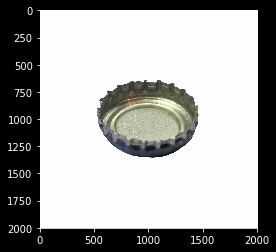

In [36]:
plt.imshow(tmp)

In [37]:
tmp.size

(2000, 2000)

In [16]:
tmp[0][1]

TypeError: 'PngImageFile' object does not support indexing

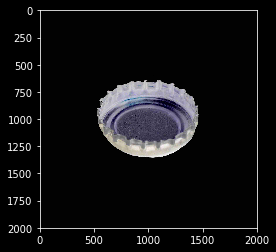

In [39]:
plt.imshow(ImageOps.invert(tmp))

In [40]:
print(ImageOps.invert(tmp).getbbox())

(0, 0, 2000, 2000)


In [29]:
im2 = tmp.crop(ImageOps.invert(tmp).getbbox())

In [30]:
im2.size

(176, 256)

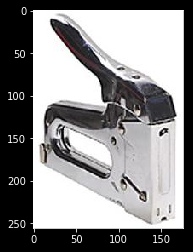

In [31]:
plt.imshow(im2)